# Familiar EDA:  Red and Black Chinchompas #
In order to get an idea of the EDA process, I decided to explore 2 similar commodities 
- Red Chinchompas 
- Black Chinchompas

## Practical Interest ##
From 18 Sept. 2020 to 25 Sept. 2020, black chinchompas fell by 266 gp. Across a 6 month period, I can see 7 total ~300 gp drops. I'd like to investigate if these dips happen regularly or can be predicted. 

As of now, my account is set up to hunt reds more efficiently (and safely). I think red chinchompas fall more frequently, but in smaller quantities. I'd like to see if this claim is true.

In [1]:
from tradeable_item import TradeableItem
%matplotlib inline

In [2]:
#commodities of interest
redChins = TradeableItem("Red Chinchompa")
blkChins = TradeableItem("Black Chinchompa")

# Red Chinchompas #

In [3]:
redChins.table.describe()

,Close,Average,Volume
count,180.000000,180.000000,1.800000e+02
mean,1376.450000,1417.827778,5.543739e+06
std,184.369961,196.775141,2.533488e+06
min,1136.000000,1206.000000,0.000000e+00
25%,1231.000000,1246.000000,4.026028e+06
50%,1311.500000,1334.500000,5.779871e+06
75%,1499.250000,1606.500000,7.031066e+06
max,1847.000000,1770.000000,1.345334e+07


/Users/nikourriola/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


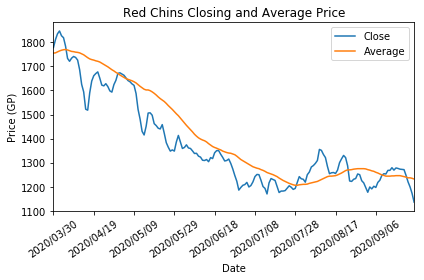

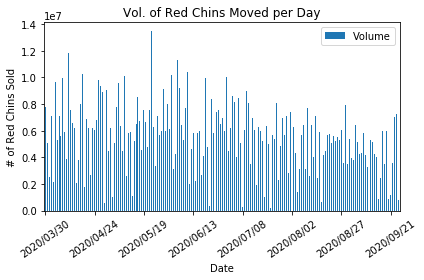

In [4]:
#visually verify that the data collected matches official OSRS GX listing
redChins.plot_time_series("Item Timestamps", ["Close", "Average"], "Red Chins Closing and Average Price", ylabel="Price (GP)", save_plot=False, verbose=True)
redChins.plot_bar_graph("Item Timestamps", ["Volume"], "Vol. of Red Chins Moved per Day", ylabel="# of Red Chins Sold", save_plot=False, verbose=True)

/Users/nikourriola/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


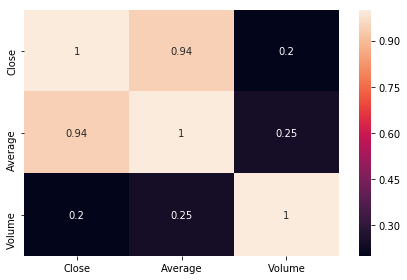

,Close,Average,Volume
Close,1.000000,0.941954,0.200051
Average,0.941954,1.000000,0.246800
Volume,0.200051,0.246800,1.000000


In [5]:
#check for possible correlations with these time series
redChins.correlation_matrix(["Close", "Average", "Volume"], " Red Chins Correlation Matrix", save=False, verbose=True)

In [22]:
ma7 = redChins.table["Close"].rolling(7).mean()
redChins.table["Moving Avg. 7"] = ma7

In [23]:
redChins.table[["Moving Avg. 7", "Close"]].describe()

,Moving Avg. 7,Close
count,174.000000,180.000000
mean,1372.211002,1376.450000
std,173.951613,184.369961
min,1188.571429,1136.000000
25%,1230.178571,1231.000000
50%,1311.142857,1311.500000
75%,1472.928571,1499.250000
max,1814.428571,1847.000000


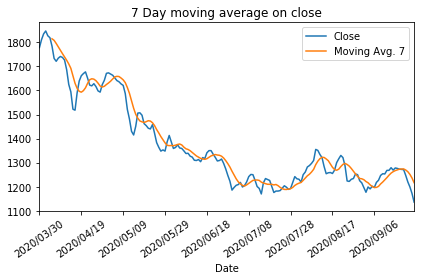

In [27]:
redChins.plot_time_series("Timestamps", ["Close", "Moving Avg. 7"], "7 Day moving average on close", save_plot=False, verbose=True)

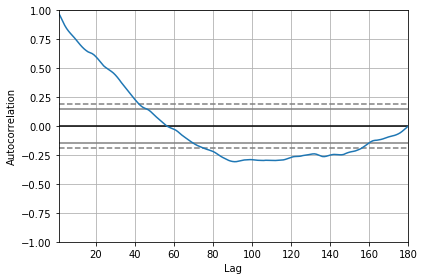

In [36]:
import pandas as pd
pd.plotting.autocorrelation_plot(redChins.table["Close"])

In [37]:
redChins.table.head()

,Item Timestamps,Timestamps_close,Close,Timestamps_average,Average,Timestamps,Volume,Moving Avg. 7
0,2020/03/30,2020/03/30,1778,2020/03/30,1755,2020/03/30,7753755,NaN
1,2020/03/31,2020/03/31,1811,2020/03/31,1756,2020/03/31,5061319,NaN
2,2020/04/01,2020/04/01,1835,2020/04/01,1760,2020/04/01,2514433,NaN
3,2020/04/02,2020/04/02,1847,2020/04/02,1764,2020/04/02,7104169,NaN
4,2020/04/03,2020/04/03,1827,2020/04/03,1767,2020/04/03,2177338,NaN


In [44]:
rdf = redChins.table
rdf["Month"] = rdf["Timestamps"].apply(lambda x: x[5:7])
rdf.head()
import seaborn as sns